# _Random forests_

Het basisconcept van **random forests** is om verschillende _decision trees_ te trainen op verschillende subsets van de data en de output van die modellen te aggregeren in een finale predictie. Het behoort daarom tot de klasse van zogenoemde **_ensemble_ leeralgoritmes**. Algemeen gesproken, worden bij _ensemble_ technieken **verschillende predictiemodellen gecombineerd om tot een betere performantie te komen**.
  
De naam _random forests_ verwijst naar het feit dat de methode gebaseerd is random **_bootstrap sampling_**[^bootstrap]. Er worden verschillende **nieuwe datasets gecreëerd door random samples te nemen uit de training data mét _teruglegging_ zodanig dat er telkens een even grote dataset wordt bekomen als bij de originele trainingsdata**. Er worden doorgaans ook verschillende subsets van de features gebruikt in de verschillende individuele _decision trees_.

## Voordelen
- Consistentie: Predicties zijn veel beter bestand tegen kleine aanpassingen in de data
- Bestand tegen _overfitting_
- Ingebouwde _missing value_ handling
- Krachtige _off-the-shelve_ oplossing voor veel complexe predictieproblemen
- Parallellisatie: verschillende _decision trees_ kunnen onafhankelijk van elkaar getraind worden

## Nadelen
- Verlies van interpreteerbaarheid
- Trage _inference_: alle individuele trees moeten eerst een predictie maken.
- Grote opslag/geheugen nodig
- Trage training
- Complexere hyper parameter tuning

[^bootstrap]: _Bootstrapping_ is een algemenere statistische techniek om de _distributie_ van schatters, zoals het gemiddelde, via sampling (meestal met teruglegging) te _empirisch_ bepalen.

In [1]:
import dtreeviz
import matplotlib
from sklearn import ensemble
from sklearn.datasets import load_iris

from ml_courses.utils import display_dtreeviz

matplotlib.set_loglevel("ERROR")

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
clf = ensemble.RandomForestClassifier(
    n_estimators=50,  # Number of trees in the forest
    max_depth=5,  # Maximum depth of the trees
    random_state=42,  # Seed for reproducibility
)
clf = clf.fit(X, y)

In [3]:
# Now we have a list of trees
clf.estimators_[:3]

[DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1935803228)]

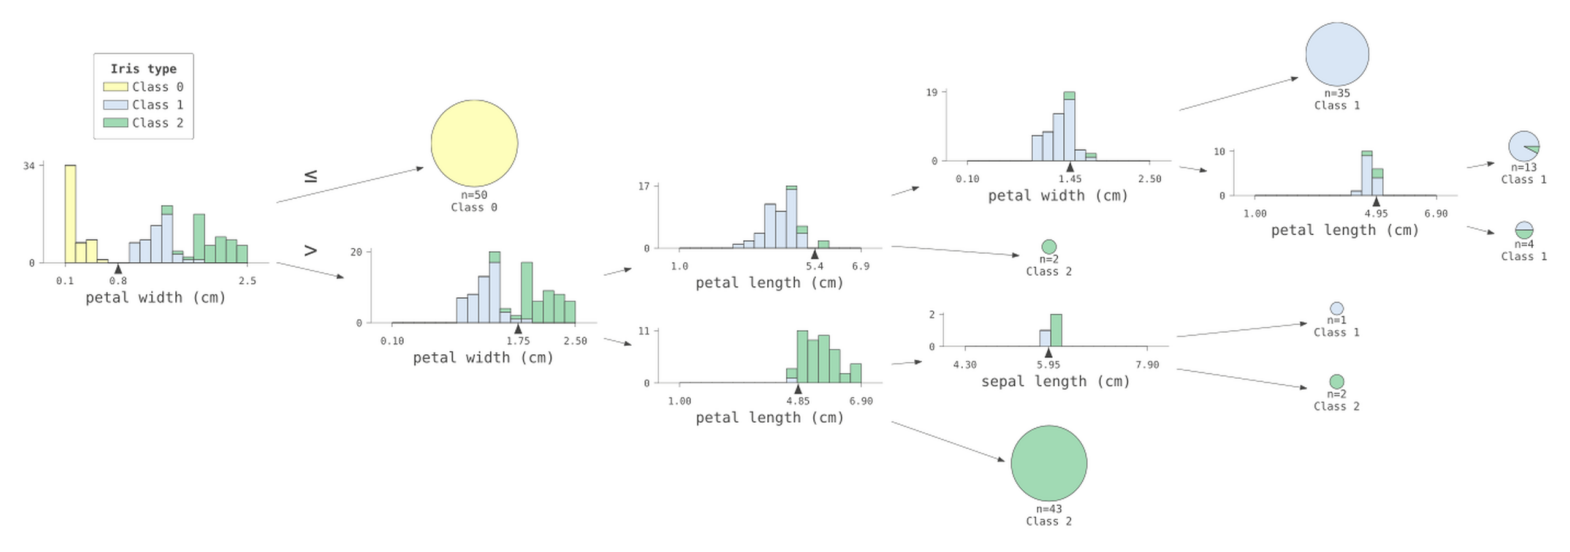

In [4]:
# Visualize the first decision tree
viz_model = dtreeviz.model(
    clf.estimators_[0],
    X_train=X,
    y_train=y,
    feature_names=iris.feature_names,
    target_name="Iris type",
    # class_names=iris.target_names,
)

display_dtreeviz(viz_model.view(orientation="LR", fontname="DejaVu Sans Mono", scale=1.5))

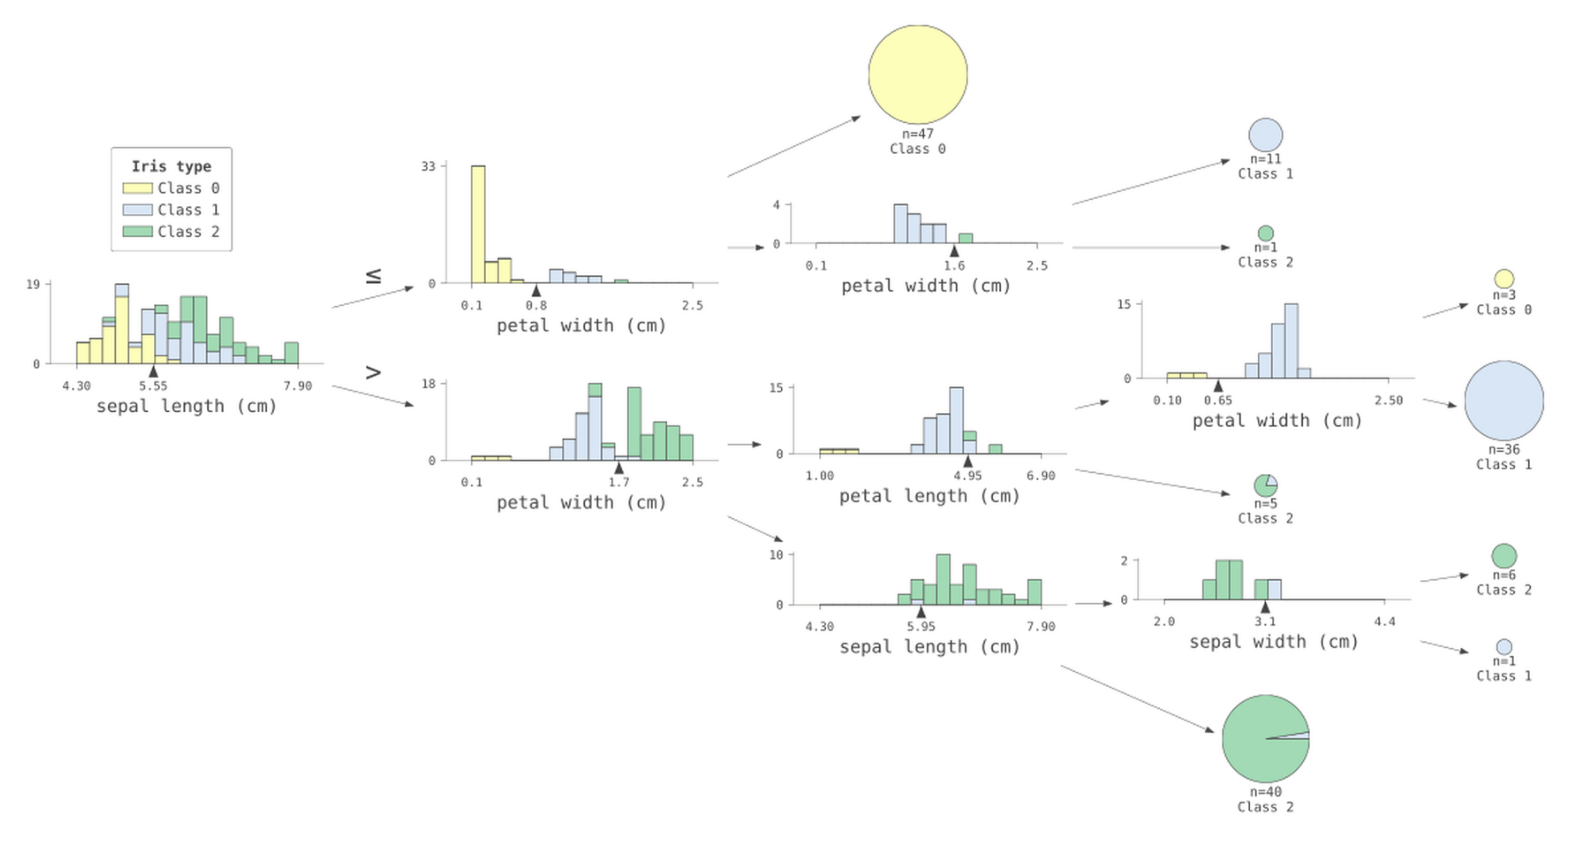

In [5]:
# Visualize the last decision tree
viz_model = dtreeviz.model(
    clf.estimators_[-1],
    X_train=X,
    y_train=y,
    feature_names=iris.feature_names,
    target_name="Iris type",
    # class_names=iris.target_names,
)

display_dtreeviz(viz_model.view(orientation="LR", fontname="DejaVu Sans Mono", scale=1.5))